# Convolução

## Motivação

A operação de **convolução** entre dois sinais surge no estudo de **Sistemas Lineares** quando temos um sistema descrito por sua **resposta ao impulso unitário**, $h(t)$, e queremos obter a saída do sistema, $y(t)$, submetido a uma determinada entrada, $x(t)$.

<img src="img\slitc_resp_imp.png" alt="figura Resposta ao Impulso de um SLITC" width="400" height="200">

In [1]:
#%load_ext tikzmagic
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from matplotlib import animation
from IPython.display import HTML, display
from ipywidgets import interact

%matplotlib inline
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['animation.writer'] = 'avconv'

## Integral da Convolução

A operação **convolução** de dois sinais é uma operação fundamental no processamento de sinais. Principalmente, porque a saída de qualquer sistema linear invariante no tempo (SLIT) é dada pela convolução de sua resposta ao impulso com o sinal de entrada. Outra importante aplicação da convolução é o [teorema da convolução](http://dspillustrations.com/pages/posts/misc/the-convolution-theorem-and-application-examples.html), o qual afirma que a multiplicação de dois sinais no dominio do tempo corresponde à convolução no domínio da frequência desses mesmos sinais e vice-versa.

Nós ilustraremos a operação da convolução e como podemos calculá-la numericamente. Formalmente, a convolução $s_1(t)*s_2(t)$ de dois sinais, $s_1(t)$ e $s_2(t)$, é definida pela integral da convolução:

$$s_1(t)*s_2(t) = \int_{-\infty}^{\infty}s_1(\tau)s_2(t-\tau)d\tau= \int_{-\infty}^{\infty}s_2(\tau)s_1(t-\tau)d\tau$$

A convolução de dois sinais contínuos é a integral do produto dos sinais, onde um dos sinais é deslocado e rebatido temporalmente. Vamos calcular a convolução dos sinais, $s_1(t)$ e $s_2(t)$:

## Exemplos de Convolução de Sinais Contínuos

In [11]:
#s1 = lambda t: np.maximum(0,1-abs(t))      # sinal 1: pulso retangular bilateral
s1 = lambda t: (t>-1) * (t<1)               # sinal 1: pulso retangular bilateral
s2 = lambda t: (t>=0) * (0.2+np.exp(-2*t))  # sinal 2: impulso exponencial lateral direito

Vamos plotar esses dois sinais para ver a aparência deles:

In [4]:
Fs = 50                                     # freq. de amostragem p/ traçado dos sinais: 50 amostra/s
T = 5                                       # a faixa de tempo p/ representação dos dois sinais
t = np.arange(-T, T, 1./Fs)                 # abscissas

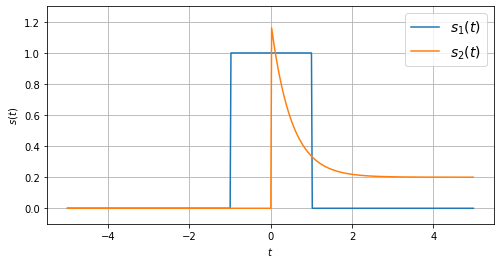

In [13]:
plt.plot(t, s1(t), label='$s_1(t)$')
plt.plot(t, s2(t), label='$s_2(t)$')
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=14); plt.ylim((-0.1, 1.3));

Agora vamos avaliar a integral da convolução dos dois sinais, $s_1(t)$ e $s_2(t)$, num determinado instante, $t_0\,=\,1.0$ s:

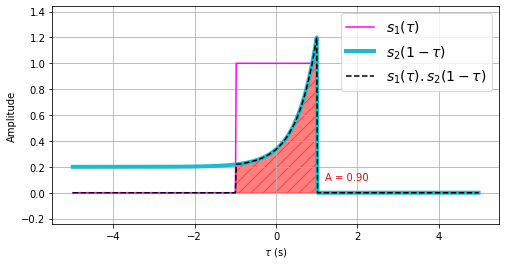

In [14]:
from scipy.integrate import simps

t0 = 1
s2_rebatido = lambda tau: s2(t0 - tau)
produto = lambda tau: s1(tau) * s2(t0 - tau)
area = simps(produto(t), t)                      # integral pelo método numérico de Simpson

plt.plot(t, s1(t), color='magenta', label=r'$s_1(\tau)$')
plt.plot(t, s2_rebatido(t), color='tab:cyan', label=r'$s_2(1-\tau)$', linewidth=4)
plt.plot(t, produto(t), 'k--', label=r'$s_1(\tau).s_2(1-\tau)$')
plt.fill(t, produto(t), color='r', alpha=0.5, hatch='//')
plt.grid(True); plt.xlabel(r'$\tau$ (s)'); plt.legend(fontsize=14); plt.gca().set_ymargin(0.2);
plt.text(1.2,.1,"A = %.2f" % area,color='r');plt.ylabel('Amplitude')

# Integral da convolução calculada pelo método numérico de Simpson
display(HTML("Resultado da convolução (área vermelha) no instante $t_0=%.0f s$: $\;\;s_1(t)*s_2(t) = %.2f$" % (t0, area)))

Como podemos ver, o sinal de traço ciano (azul piscina), $s_2(1-\tau)$, é resultado do rebatimento em relação ao eixo vertical do sinal $s_2(\tau)$ e depois do deslocamento por $t_0=1.0$ s para direita. O valor da integral da convolução nesse instante $t_0=1.0$ s, corresponde à área sombreada em vermelho, e é igual a $0,9$.

Agora vamos escrever uma função para calcular e mostrar o resultado da integral da convolução para diferentes deslocamentos de tempo...

In [25]:
from scipy.integrate import simps

def mostraConvolucao(s1, s2, t0):
    # Calcula o resultado da integral da convolução usando a regra de integração de Simpson
    convolucao = np.zeros(len(t))
    for n, t_ in enumerate(t):
        prod = lambda tau: s1(tau) * s2(t_ - tau)
        convolucao[n] = simps(prod(t), t)
    
    # Cria o sinal rebatido e deslocado no tempo
    s_reb = lambda t: s2(t0 - t)
    prod  = lambda tau: s1(tau) * s2(t0 - tau)

    # Plota os sinais
    plt.gcf().clear()
    plt.subplot(211); plt.gca().set_ymargin(0.05)
    plt.plot(t, s1(t), label=r'$s_1(\tau)$')
    plt.plot(t, s_reb(t), label=r'$s_2(t_0-\tau)$')
    plt.fill(t, prod(t), color='r', alpha=0.5, edgecolor='black', hatch='//')
    plt.plot(t, prod(t), 'r-', label=r'$s_1(\tau)s_2(t_0-\tau)$')
    plt.grid(True); plt.xlabel(r'$\tau$'); plt.ylabel(r'$x(\tau)$')
    plt.legend(title='Sinais Contínuos', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);
    plt.text(-4, 0.6, '$t_0\;=\;%.1f$' % t0, bbox=dict(fc='yellow'))
    
    # Plota a convolução
    plt.subplot(212); plt.gca().set_ymargin(0.05)
    plt.plot(t, convolucao, label='$s_1(t)*s_2(t)$')
    
    # recalcula o valor da integral da convolução no presente deslocamento temporal t0
    valor_pres = simps(prod(t), t)
    plt.plot(t0, valor_pres, 'ro')    # plota o ponto
    plt.grid(True); plt.xlabel('$t$'); plt.ylabel('$s_1(t)*s_2(t)$'); 
    plt.legend(title='Sinais Contínuos', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);
    plt.text(-4, 0.2, '$Area(%.1f)\;=\;%.1f$' % (t0, valor_pres), bbox=dict(fc='yellow'))
    plt.show()

In [26]:
plt.figure(figsize=(10,6));
s1 = lambda t: (t>-1) * (t<1)
s2 = lambda t: (t>=0) * (0.2 + np.exp(-2*t)) 
interact(lambda t0: mostraConvolucao(s1, s2, t0), t0 = (-2,3,0.1));

interactive(children=(FloatSlider(value=0.0, description='t0', max=3.0, min=-2.0), Output()), _dom_classes=('w…

A animação mostra, como o sinal de cor laranha é gradualmente deslocado para a direita, produzindo mais e mais sobreposição entre ambos sinais e portanto aumentando a área sob o produto dos sinais $s_1(t)$ e $s_2(t)$. Então, quando o sinal laranja, $s_2(t_0-\tau)$  é deslocado ainda mais para a direita, nós vemos que a área sob o produto começa a diminui novamente.

Outra importante propriedade pode ser vista a partir da saída da convolução: embora o sinal de entrada, $s_1(t)$ (azul), tenha um salto abrupto em $t=0$, a convolução de ambos sinais é um sinal suave na saída. Essa propriedade se deve à integral no cálculo da convolução: a integral de alguma forma cria um filtro de média móvel, que suaviza saltos imediatos no sinal de saída (desde que a entrada não contenha impulsos unitários - delta de Dirac). De modo que uma propriedade geral da convolução, é o fato que o resultado da **convolução do produto de dois sinais é sempre um sinal mais suave que o sinal de entrada** (exceto nos instantes em que ocorrem impulsos unitários).

Vamos ver um exemplo clássico para explicação da convolução: a **convolução de um sinal retangular com ele próprio**.
O resultado é um sinal triangular com um valor de pico ocorrendo quando ambos os retângulo se sobrepõem perfeitamente.

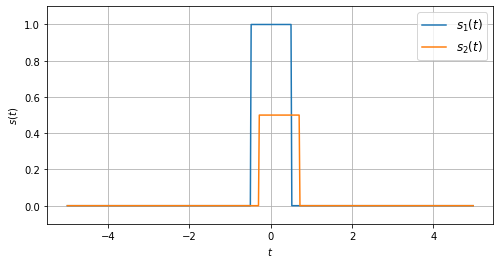

In [27]:
s1 = lambda t: (abs(t)<0.5).astype(float)
s2 = lambda t: 0.5*(abs(t-0.2)<0.5).astype(float)

plt.plot(t, s1(t), label='$s_1(t)$')
plt.plot(t, s2(t), label='$s_2(t)$')
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); plt.legend(fontsize=12); plt.ylim((-0.1, 1.1));

In [28]:
plt.figure();
interact(lambda t0: mostraConvolucao(s1, s2, t0), t0 = (-1.5,1.5,0.05));

interactive(children=(FloatSlider(value=0.0, description='t0', max=1.5, min=-1.5, step=0.05), Output()), _dom_…

Vamos finalmente ver a convolução de um impulso com decaimento exponencial com um sinal senoidal chaveado. Se entendermos o sinal azul como a resposta ao impulso de um SLITC e o sinal verde como sendo a sua entrada, então a convolução de ambos resultará na saída do SLITC para essa particular entrada, uma senóide chaveada.

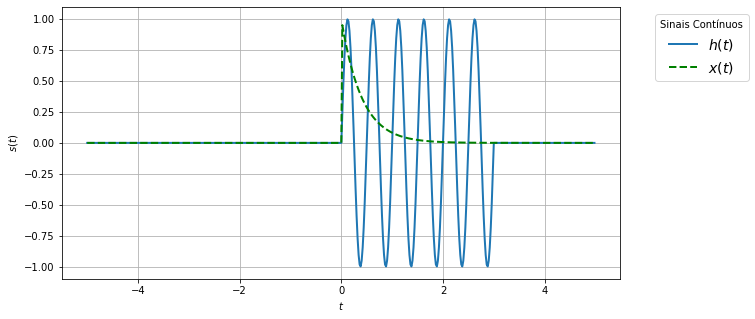

In [31]:
h = lambda t: (t>0) * np.sin(4*np.pi*t) * (t>0) * (t<3)
# x = lambda t: np.sin(2*np.pi*t) * (t>0)
x = lambda t: np.exp(-2.5*t) * (t>0)

plt.figure(figsize=(10,5))
plt.plot(t, h(t), label='$h(t)$', linewidth=2)
plt.plot(t, x(t), 'g--', label='$x(t)$', linewidth=2)
plt.grid(True); plt.ylabel('$s(t)$'); plt.xlabel('$t$'); 
plt.legend(title='Sinais Contínuos', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14); #plt.ylim((-1.1, 1.1));

Vimos que a resposta ao impulso (azul) é um sinal causal, ou seja $s_1(t)=0, t<0$. Como a senóide é chaveada em $t=0$, a saída do sistema é nula para tempos antes do chaveamento. Então, depois de alguma fase transitória, a saída do sistema torna-se uma senóide com a mesma frequência mas com fase e amplitude diferentes. Esta é uma **propriedade fundamental dos SLIT's**: a resposta de um SLIT a um harmônico (senóide de freq. múltipla da freq. furndamental) é um harmônico de mesma frequência, mas (possivelmente) com fase e amplitude diferentes. Podemos dizer também que **harmônicos são auto-funções dos SLIT's**.  Portanto, em particular, harmônicos sao auto-funções da integral de convolução.

In [32]:
interact(lambda t0: mostraConvolucao(x, h, t0), t0 = (-2,4,0.05));

interactive(children=(FloatSlider(value=1.0, description='t0', max=4.0, min=-2.0, step=0.05), Output()), _dom_…

## Propriedades da Convolução

### Comutativa $$\boxed{x_1(t)\ast x_2(t)=x_2(t)\ast x_1(t)}$$

### Distributiva $$\boxed{x_1(t)\ast[x_2(t)+x_3(t)]=x_1(t)\ast x_2(t)+x_1(t)\ast x_3(t)}$$

### Associativa $$\boxed{x_1(t)\ast[x_2(t)\ast x_3(t)]=[x_1(t)\ast x_2(t)]\ast x_3(t)}$$

### Deslocamento 
Se $$x_1(t)\ast x_2(t)=y(t)$$
então: $$x_1(t)\ast x_2(t-\tau)=x_1(t-\tau)\ast x_2(t)=y(t-\tau)$$
e: 
### $$\boxed{x_1(t-\lambda)\ast x_2(t-\tau)=y(t-\tau-\lambda)}$$

### Largura 
Se a duração (largura) de $x_1(t)$ e $x_2(t)$ forem $T_1$ e $T_2$, então a duração da convolução desses sinais será $T_1+T_2$.  

<img src="img\largura_conv.jpg" alt="imagem largura da convolução" width="600" height="350">

## <font color="red">Exercícios</font>
<ol>
    <li>Para um SLITC com resposta ao impulso dada por $h(t)=0.6^{e-t}u(t)$, determine e trace a resposta desse sistema para as entradas: <ol type="a"><li>$2.u(t)$</li><li>$3.e^{-3t}u(t)$.</li>  
    <i>Dica</i>: A constante $e$ (constante de Euler, base do logaritmo natural, constante de Napier) definida por $e$ = 2.71828182845904523536028747135266249775724709369995... pode ser encontrada no pacote NUMPY e acessada por <b><tt>numpy.e</tt></b> ou <b><tt>numpy.exp()</tt></b>.</ol></li> 
    <li>Determine a convolução de $e^{-2t}u(t)$ e $(1-e^{-t})u(t)$ usando a tabela 2.1, p.167, do livro-texto. Trace o resultado da convolução obtido analiticamente e compare com a resolução prática usando o script do exercício anterior.</li>
    <li>Trace as saídas geradas pelas entradas $u(t)$, $e^{-t}u(t)$, $e^{-2t}u(t)$ e $sen(3t).u(t)$ de um SLITC descrito por sua resposta ao impulso, $h(t)=e^{-t/2}u(t)$ num único plano cartesiano. Use legenda para identificar as curvas.</li></ol>

Solução do Exercício 1.A:

Solução do Exercício 1.B:

Solução do Exercício 2:

Solução do Exercício 3:

## Conclusão
> - A operação de convolução de dois sinais é dada pela integral do produto deles, onde um sinal é rebatido e deslocado no tempo.
> - A operação de convolução suaviza o sinal de entrada no SLITC, ou seja, a saída do SLITC é um sinal mais suave do que se apresenta à entrada (para a resposta ao impulso sendo um impulso com decaimento exponencial).
> - Sinais harmônicos (seno, cosseno) são auto-funções dos SLITCs (convolução). Isto significa que ao convoluir um seno com algum outro sinal o resultado será outro seno de mesma frequência mas de amplitude e fase diferentes.